# Estimate root of number via pytorch

In [1]:
import matplotlib.pyplot as plt
import re
import torch  # ==1.11.0

from torch import Tensor
from typing import List, Tuple

In [2]:
optimizers = [
    torch.optim.Adam,
    torch.optim.AdamW,
    torch.optim.RMSprop,
    torch.optim.Adagrad,
    torch.optim.Adadelta,
    torch.optim.Adamax,
]

In [3]:
def get_root(
    number, 
    optimizer=torch.optim.Adam,
    random_seed=0,
    max_steps=2000,
) ->  Tuple[List[float], bool]:
    # set random seed
    torch.manual_seed(random_seed)

    # init x and y 
    x = torch.rand(size=(1,), requires_grad=True)
    y = Tensor([number])

    # define loss and optimizer
    loss_func = torch.nn.MSELoss()
    optimizer = optimizer(params=[x])

    # track progress
    estimates = list()
    losses = list()

    converged = False
    for step in range(max_steps):
        
        # stop when converged (last five losses close to zero)
        if losses and all(l < 1e-10 for l in losses[-5:]):
            converged = True
            return estimates, converged
        
        # set gradients to zero
        optimizer.zero_grad()

        # make prediction
        pred = x ** 2

        # calculate loss
        loss = loss_func(y, pred)
        
        # backpropagation and update params
        loss.backward()
        optimizer.step()

        # track progress
        losses.append(loss.item())
        estimates.append(x.item())
        
    return estimates, converged

In [4]:
number = 3
estimates, converged = get_root(
    number=number, optimizer=torch.optim.RMSprop,
)
print(f'Estimated root of {number} is {estimates[-1]:.6f} ({converged=}).')
print(f'Real: {3 ** 0.5=:.6f}')

Estimated root of 3 is 1.732049 (converged=True).
Real: 3 ** 0.5=1.732051


## Compare optimizers

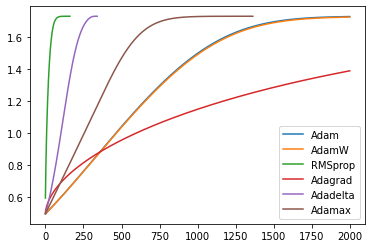

In [5]:
number = 3
fig, ax = plt.subplots()
for optimizer in optimizers:
    estimates, _ = get_root(number, optimizer=optimizer)
    optimizer_name = re.findall(pattern=r'\.([\w]+)', string=str(optimizer))[-1]
    ax.plot(estimates, label=optimizer_name)

plt.legend()
plt.savefig(f'root_{number}.png')
plt.show()